In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from datetime import datetime

In [ ]:
#import data
df=pd.read_csv('Avocado_Prices_2015_2022.csv')
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,1/4/2015,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,1/4/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


Creat a chart that display the count of avocados bought

In [ ]:
values= df['type'].value_counts().tolist()
values

[26709, 26706]

In [ ]:
names= df['type'].value_counts().index.tolist()
names

['conventional', 'organic']

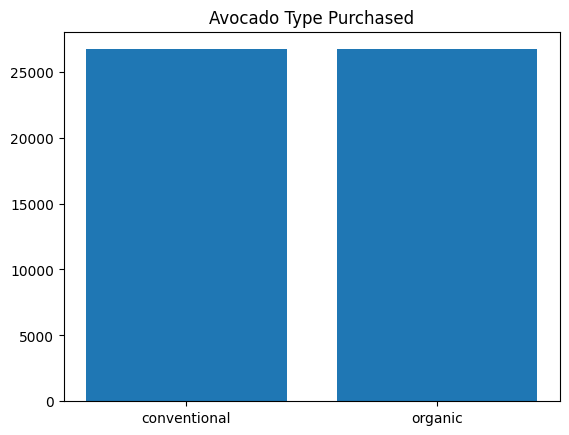

In [ ]:
plt.bar(names, values)
plt.title('Avocado Type Purchased')
plt.show()

Comparing the prices of avocado with regions Los Angeles, New York, DallasFtworth, Seattle, Miami, and Greatlakes

In [ ]:
df_regions = df[ (df['region'] == 'LosAngeles') | (df['region'] == 'NewYork') | (df['region'] == 'DallasFtWorth' ) |
 (df['region'] == 'Seattle' ) | (df['region'] == 'MiamiFtLauderdale' ) | (df['region'] == 'GreatLakes' ) ]
df_regions.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
22,1/4/2015,0.74,1086363.97,612795.80,374420.68,9817.28,89330.21,54563.33,34760.08,6.80,conventional,DallasFtWorth
23,1/4/2015,1.35,9895.96,4634.70,1647.92,0.00,3613.34,3613.34,0.00,0.00,organic,DallasFtWorth
30,1/4/2015,1.02,3382800.12,467259.47,2059657.71,318102.38,537780.56,412779.64,111072.91,13928.01,conventional,GreatLakes
31,1/4/2015,1.54,61615.10,3633.93,42963.06,0.00,15018.11,9763.55,5254.56,0.00,organic,GreatLakes
44,1/4/2015,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,LosAngeles


In [ ]:
df_regions.describe()

,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags
count,4870.000000,4.870000e+03,4.870000e+03,4.870000e+03,4.870000e+03,4.870000e+03,3.610000e+03,3610.000000,3610.000000
mean,1.451717,1.014908e+06,2.860662e+05,2.725063e+05,4.583351e+04,2.585346e+05,1.417802e+05,21217.420269,4455.037139
std,0.419360,1.246587e+06,4.403524e+05,4.310880e+05,1.129734e+05,3.262811e+05,2.769880e+05,63767.096969,13942.386152
min,0.530000,6.568670e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.140000,7.546655e+04,6.385028e+03,1.185993e+04,1.410000e+00,2.697517e+04,0.000000e+00,0.000000,0.000000
50%,1.419834,3.348745e+05,3.663296e+04,5.030912e+04,4.912550e+02,8.233612e+04,4.534385e+03,3.460000,0.000000
75%,1.717382,1.576063e+06,5.358372e+05,3.224171e+05,1.492472e+04,4.258681e+05,1.104933e+05,11492.027500,15.870000
max,2.960000,6.575187e+06,2.986925e+06,3.117639e+06,1.156849e+06,2.701610e+06,2.656630e+06,832296.700000,130892.800000


<ipython-input-32-dc49161b867a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df_regions, x='region', y='AveragePrice', kind='box', palette='Pastel1')


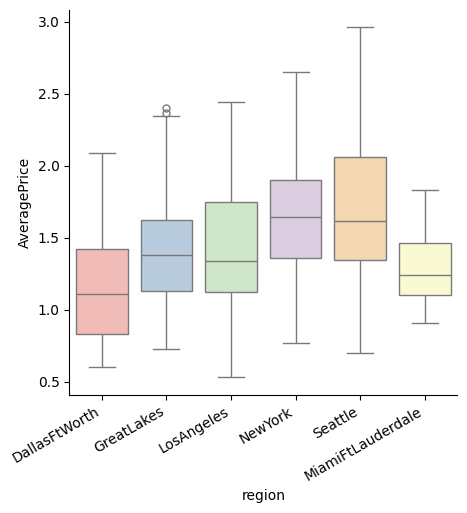

In [ ]:
sns.catplot(data=df_regions, x='region', y='AveragePrice', kind='box', palette='Pastel1')
plt.gcf().autofmt_xdate() #auto tilts x labels

plt.show()

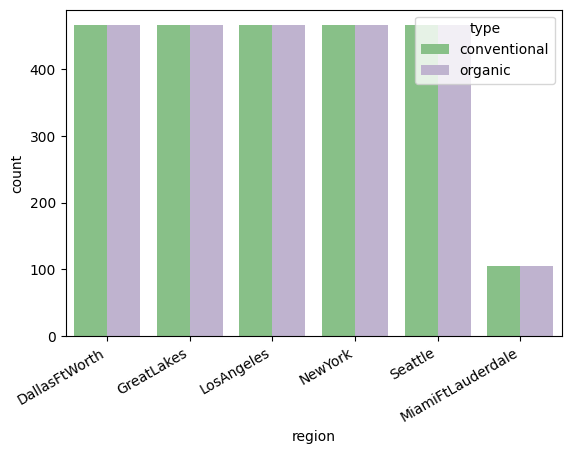

In [ ]:
sns.countplot(data=df_regions, x='region', hue='type', palette='Accent')
plt.gcf().autofmt_xdate() #auto tilts x labels
plt.show()

The relationship between Total Volume, Average Price, Type and Region

In [ ]:
new_df=df_regions[["AveragePrice", "TotalVolume", "type", ]]
new_df.head()

,AveragePrice,TotalVolume,type
22,0.74,1086363.97,conventional
23,1.35,9895.96,organic
30,1.02,3382800.12,conventional
31,1.54,61615.10,organic
44,0.85,2682159.95,conventional


In [ ]:
#dummy variables
dummies=pd.get_dummies(new_df, columns=['type']) #drop_first=True,

dummies.head()

,AveragePrice,TotalVolume,type_conventional,type_organic
22,0.74,1086363.97,1,0
23,1.35,9895.96,0,1
30,1.02,3382800.12,1,0
31,1.54,61615.10,0,1
44,0.85,2682159.95,1,0


In [ ]:
correlation= dummies.corr()
correlation

,AveragePrice,TotalVolume,type_conventional,type_organic
AveragePrice,1.000000,-0.546145,-0.617155,0.617155
TotalVolume,-0.546145,1.000000,0.747071,-0.747071
type_conventional,-0.617155,0.747071,1.000000,-1.000000
type_organic,0.617155,-0.747071,-1.000000,1.000000


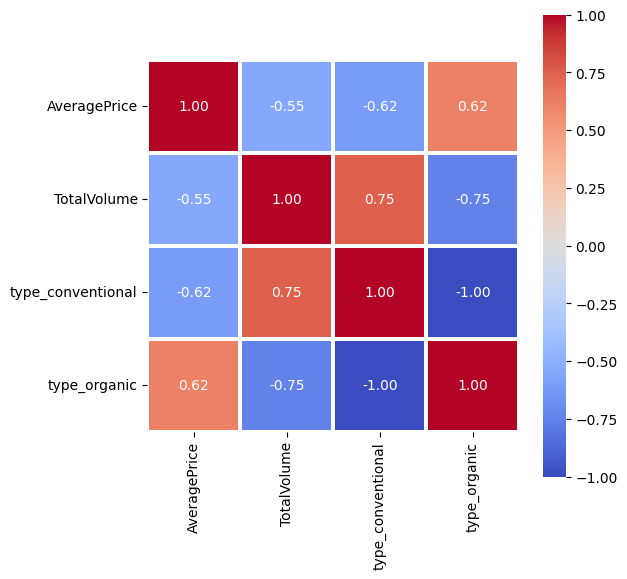

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, square=True, cmap='coolwarm', vmin=-1, vmax=1, linewidth=1.5,
           annot=True, fmt='.2f' )
plt.xticks(rotation=90)
plt.show()

In [ ]:
#define a mask (to cover some information)
tri_matrix= np.triu(correlation)
print(tri_matrix)

[[ 1.         -0.5461452  -0.61715537  0.61715537]
 [ 0.          1.          0.74707079 -0.74707079]
 [ 0.          0.          1.         -1.        ]
 [ 0.          0.          0.          1.        ]]


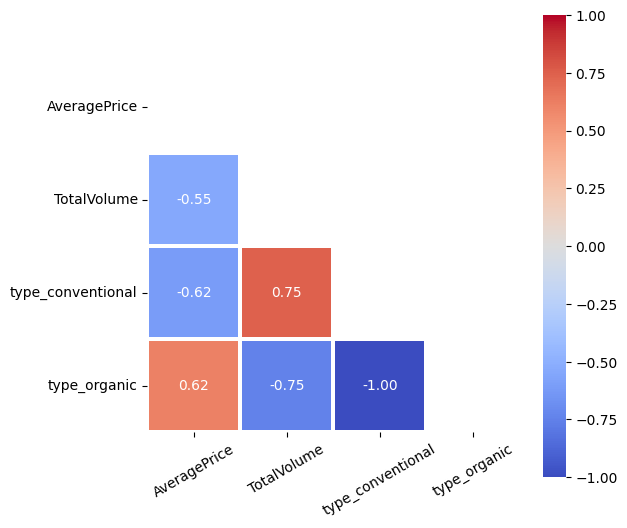

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, square=True, cmap='coolwarm', vmin=-1, vmax=1, linewidth=1.5,
           annot=True, fmt='.2f', mask=tri_matrix)
plt.xticks(rotation=30)
plt.show()

In [ ]:
df_regions.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
22,1/4/2015,0.74,1086363.97,612795.80,374420.68,9817.28,89330.21,54563.33,34760.08,6.80,conventional,DallasFtWorth
23,1/4/2015,1.35,9895.96,4634.70,1647.92,0.00,3613.34,3613.34,0.00,0.00,organic,DallasFtWorth
30,1/4/2015,1.02,3382800.12,467259.47,2059657.71,318102.38,537780.56,412779.64,111072.91,13928.01,conventional,GreatLakes
31,1/4/2015,1.54,61615.10,3633.93,42963.06,0.00,15018.11,9763.55,5254.56,0.00,organic,GreatLakes
44,1/4/2015,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,LosAngeles


In [ ]:
#2015
df_regions["Date"]=pd.to_datetime(df["Date"])
df.set_index("Date").head(2)
df_2015= df_regions[df_regions["Date"].between('1/1/15','12/31/15')]
df_2015.head()


<ipython-input-88-20077a609662>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regions["Date"]=pd.to_datetime(df["Date"])


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
22,2015-01-04,0.74,1086363.97,612795.80,374420.68,9817.28,89330.21,54563.33,34760.08,6.80,conventional,DallasFtWorth
23,2015-01-04,1.35,9895.96,4634.70,1647.92,0.00,3613.34,3613.34,0.00,0.00,organic,DallasFtWorth
30,2015-01-04,1.02,3382800.12,467259.47,2059657.71,318102.38,537780.56,412779.64,111072.91,13928.01,conventional,GreatLakes
31,2015-01-04,1.54,61615.10,3633.93,42963.06,0.00,15018.11,9763.55,5254.56,0.00,organic,GreatLakes
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,LosAngeles


In [ ]:
#Average Price through examined cities
avg_2015=df_2015.loc[:,'AveragePrice'].mean()
print(avg_2015)

1.3246730769230768


In [ ]:
#Average 2015 in LA
df_2015LA=df_2015[ (df_2015['region'] == 'LosAngeles')]
avg_2015LA=df_2015LA.loc[:,'AveragePrice'].mean()
print(avg_2015LA)

1.1525


In [ ]:
#Average 2015 in DFT
df_2015DFT=df_2015[ (df_2015['region'] == 'DallasFtWorth')]
avg_2015DFT=df_2015DFT.loc[:,'AveragePrice'].mean()
print(avg_2015DFT)

1.0778846153846153


In [ ]:
#Average 2015 in GL
df_2015GL=df_2015[ (df_2015['region'] == 'GreatLakes')]
avg_2015GL=df_2015GL.loc[:,'AveragePrice'].mean()
print(avg_2015GL)

1.3262500000000002


In [ ]:
#Average 2015 in NY
df_2015NY=df_2015[ (df_2015['region'] == 'NewYork')]
avg_2015NY=df_2015NY.loc[:,'AveragePrice'].mean()
print(avg_2015NY)

1.6445192307692307


In [ ]:
#Average 2015 in SEA
df_2015SEA=df_2015[ (df_2015['region'] == 'Seattle')]
avg_2015SEA=df_2015SEA.loc[:,'AveragePrice'].mean()
print(avg_2015SEA)

1.4222115384615388


In [ ]:
#Average 2015 in MIA
df_2015MIA=df_2015[ (df_2015['region'] == 'MiamiFTLaduerdale')]
avg_2015MIA=df_2015MIA.loc[:,'AveragePrice'].mean()
print(avg_2015MIA)

nan


In [ ]:
#2016
df_regions["Date"]=pd.to_datetime(df["Date"])
df.set_index("Date").head(2)
df_2016= df_regions[df_regions["Date"].between('1/1/16','12/31/16')]
df_2016.head()

<ipython-input-102-456ff8a2c9e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regions["Date"]=pd.to_datetime(df["Date"])


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
5637,2016-01-03,0.78,1191927.54,551921.61,411340.37,80184.39,148481.17,144358.85,3764.81,357.51,conventional,DallasFtWorth
5638,2016-01-03,1.26,10777.27,4802.52,397.26,0.00,5577.49,5384.85,192.64,0.00,organic,DallasFtWorth
5645,2016-01-03,0.92,4065583.41,604697.28,2200074.78,543717.88,717093.47,438279.98,147920.69,130892.80,conventional,GreatLakes
5646,2016-01-03,1.44,83325.98,8479.65,56407.64,3.09,18435.60,5929.53,12506.07,0.00,organic,GreatLakes
5659,2016-01-03,0.64,3967109.33,1232109.79,992212.57,90511.09,1652275.88,1415836.57,226121.90,10317.41,conventional,LosAngeles


In [ ]:
#Average Price through examined cities
avg_2016=df_2016.loc[:,'AveragePrice'].mean()
print(avg_2016)

1.2838461538461536


In [ ]:
#Average 2016 in LA
df_2016LA=df_2016[ (df_2016['region'] == 'LosAngeles')]
avg_2016LA=df_2016LA.loc[:,'AveragePrice'].mean()
print(avg_2016LA)

1.08375


In [ ]:
#Average 2016 in DFT
df_2016DFT=df_2016[ (df_2016['region'] == 'DallasFtWorth')]
avg_2016DFT=df_2015DFT.loc[:,'AveragePrice'].mean()
print(avg_2016DFT)

1.0778846153846153


In [ ]:
#Average 2016 in GL
df_2016GL=df_2016[ (df_2016['region'] == 'GreatLakes')]
avg_2016GL=df_2016GL.loc[:,'AveragePrice'].mean()
print(avg_2016GL)

1.2770192307692307


In [ ]:
#Average 2016 in SEA
df_2016SEA=df_2016[ (df_2016['region'] == 'Seattle')]
avg_2016SEA=df_2016SEA.loc[:,'AveragePrice'].mean()
print(avg_2016SEA)

1.3002884615384613


In [ ]:
#Average 2016 in MIA
df_2016MIA=df_2016[ (df_2016['region'] == 'MiamiFTLaduerdale')]
avg_2016MIA=df_2016MIA.loc[:,'AveragePrice'].mean()
print(avg_2016MIA)

nan


In [ ]:
#2017
df_regions["Date"]=pd.to_datetime(df["Date"])
df.set_index("Date").head(2)
df_2017= df_regions[df_regions["Date"].between('1/1/17','12/31/17')]
df_2017.head()

<ipython-input-112-3e563e91571c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regions["Date"]=pd.to_datetime(df["Date"])


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
11253,2017-01-01,0.68,1336539.20,526727.72,438041.57,4254.90,367515.01,364446.02,2152.59,916.40,conventional,DallasFtWorth
11254,2017-01-01,1.06,15669.84,4110.67,312.11,0.00,11247.06,11137.36,109.70,0.00,organic,DallasFtWorth
11261,2017-01-01,0.88,4225245.40,636277.70,2157249.60,189356.95,1242361.15,885769.21,349032.80,7559.14,conventional,GreatLakes
11262,2017-01-01,1.44,104153.91,4104.86,69800.29,0.00,30248.76,23593.03,6655.73,0.00,organic,GreatLakes
11275,2017-01-01,0.84,3551337.17,1223299.39,829896.69,56808.74,1441332.35,1332601.11,88931.96,19799.28,conventional,LosAngeles


In [ ]:
#Average Price through examined cities
avg_2017=df_2017.loc[:,'AveragePrice'].mean()
print(avg_2017)

1.4776415094339623


In [ ]:
#Average 2017 in LA
df_2017LA=df_2017[ (df_2017['region'] == 'LosAngeles')]
avg_2017LA=df_2017LA.loc[:,'AveragePrice'].mean()
print(avg_2017LA)

1.3773584905660377


In [ ]:
#Average 2017 in DFT
df_2017DFT=df_2017[ (df_2017['region'] == 'DallasFtWorth')]
avg_2017DFT=df_2017DFT.loc[:,'AveragePrice'].mean()
print(avg_2017DFT)

1.1769811320754717


In [ ]:
#Average 2017 in GL
df_2017GL=df_2017[ (df_2017['region'] == 'GreatLakes')]
avg_2017GL=df_2017GL.loc[:,'AveragePrice'].mean()
print(avg_2017GL)

1.4246226415094339


In [ ]:
#Average 2016 in SEA
df_2017SEA=df_2017[ (df_2017['region'] == 'Seattle')]
avg_2017SEA=df_2017SEA.loc[:,'AveragePrice'].mean()
print(avg_2017SEA)

1.5993396226415095


In [ ]:
#Average 2017 in MIA
df_2017MIA=df_2017[ (df_2017['region'] == 'MiamiFTLaduerdale')]
avg_2017MIA=df_2017MIA.loc[:,'AveragePrice'].mean()
print(avg_2017MIA)

nan


In [ ]:
#2018
df_regions["Date"]=pd.to_datetime(df["Date"])
df.set_index("Date").head(2)
df_2018= df_regions[df_regions["Date"].between('1/1/18','12/31/18')]
df_2018.head()

<ipython-input-120-312593719459>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regions["Date"]=pd.to_datetime(df["Date"])


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
16977,2018-01-08,0.983711,1043520.58,577659.97,208831.90,5329.51,112602.00,0.0,0.0,0.0,conventional,DallasFtWorth
16978,2018-01-08,1.551119,20143.83,3496.05,626.95,41.24,12684.45,0.0,0.0,0.0,organic,DallasFtWorth
16985,2018-01-08,1.181078,3466529.64,938217.64,1099545.45,294238.41,423353.77,0.0,0.0,0.0,conventional,GreatLakes
16986,2018-01-08,1.621927,187843.10,7628.94,47064.47,0.00,91155.05,0.0,0.0,0.0,organic,GreatLakes
16999,2018-01-08,1.104962,2360651.46,1148203.64,314784.12,81031.29,225107.71,0.0,0.0,0.0,conventional,LosAngeles


In [ ]:
#Average Price through examined cities
avg_2018=df_2018.loc[:,'AveragePrice'].mean()
print(avg_2018)

1.4890076433769233


In [ ]:
#Average 2018 in LA
df_2018LA=df_2018[ (df_2018['region'] == 'LosAngeles')]
avg_2018LA=df_2018LA.loc[:,'AveragePrice'].mean()
print(avg_2018LA)

1.4753340913942306


In [ ]:
#Average 2018 in DFT
df_2018DFT=df_2018[ (df_2018['region'] == 'DallasFtWorth')]
avg_2018DFT=df_2018DFT.loc[:,'AveragePrice'].mean()
print(avg_2018DFT)

1.1948910561826922


In [ ]:
#Average 2018 in GL
df_2018GL=df_2018[ (df_2018['region'] == 'GreatLakes')]
avg_2018GL=df_2018GL.loc[:,'AveragePrice'].mean()
print(avg_2018GL)

1.419049746769231


In [ ]:
#Average 2018 in SEA
df_2018SEA=df_2018[ (df_2018['region'] == 'Seattle')]
avg_2018SEA=df_2018SEA.loc[:,'AveragePrice'].mean()
print(avg_2018SEA)

1.692567784125


In [ ]:
#Average 2018 in MIA
df_2018MIA=df_2018[ (df_2018['region'] == 'MiamiFTLaduerdale')]
avg_2018MIA=df_2018MIA.loc[:,'AveragePrice'].mean()
print(avg_2018MIA)

nan


In [ ]:
#2019
df_regions["Date"]=pd.to_datetime(df["Date"])
df.set_index("Date").head(2)
df_2019= df_regions[df_regions["Date"].between('1/1/19','12/31/19')]
df_2019.head()

<ipython-input-128-a2e025cf5dfb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regions["Date"]=pd.to_datetime(df["Date"])


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
23113,2019-01-07,0.723430,1547210.61,733641.00,210143.17,15816.45,221224.30,0.0,0.0,0.0,conventional,DallasFtWorth
23114,2019-01-07,1.561250,31427.73,5978.74,494.76,445.21,16502.29,0.0,0.0,0.0,organic,DallasFtWorth
23121,2019-01-07,1.106743,3812441.96,808855.62,1062628.46,313365.99,447175.98,0.0,0.0,0.0,conventional,GreatLakes
23122,2019-01-07,1.371280,275987.52,9419.85,37680.22,4.57,110477.64,0.0,0.0,0.0,organic,GreatLakes
23135,2019-01-07,0.922948,3084449.65,1007120.69,335060.27,67878.33,578181.72,0.0,0.0,0.0,conventional,LosAngeles


In [ ]:
#Average Price through examined cities
avg_2019=df_2019.loc[:,'AveragePrice'].mean()
print(avg_2019)

1.5700520743692308


In [ ]:
#Average 2019 in LA
df_2019LA=df_2019[ (df_2019['region'] == 'LosAngeles')]
avg_2019LA=df_2019LA.loc[:,'AveragePrice'].mean()
print(avg_2019LA)

1.5462661842884615


In [ ]:
#Average 2019 in DFT
df_2019DFT=df_2019[ (df_2019['region'] == 'DallasFtWorth')]
avg_2019DFT=df_2019DFT.loc[:,'AveragePrice'].mean()
print(avg_2019DFT)

1.2097962522788461


In [ ]:
#Average 2018 in GL
df_2019GL=df_2019[ (df_2019['region'] == 'GreatLakes')]
avg_2019GL=df_2019GL.loc[:,'AveragePrice'].mean()
print(avg_2019GL)

1.5503329596923079


In [ ]:
#Average 2019 in SEA
df_2019SEA=df_2019[ (df_2019['region'] == 'Seattle')]
avg_2019SEA=df_2019SEA.loc[:,'AveragePrice'].mean()
print(avg_2019SEA)

1.8305317989423076


In [ ]:
#Average 2019 in MIA
df_2019MIA=df_2019[ (df_2019['region'] == 'MiamiFTLaduerdale')]
avg_2019MIA=df_2019MIA.loc[:,'AveragePrice'].mean()
print(avg_2019MIA)

nan


In [ ]:
#2020
df_regions["Date"]=pd.to_datetime(df["Date"])
df.set_index("Date").head(2)
df_2020= df_regions[df_regions["Date"].between('1/1/20','12/31/20')]
df_2020.head()

<ipython-input-136-2abc48170046>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regions["Date"]=pd.to_datetime(df["Date"])


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
29249,2020-01-06,0.792647,1362937.00,557622.46,179864.98,12253.02,227102.54,0.0,0.0,0.0,conventional,DallasFtWorth
29250,2020-01-06,1.341334,27696.88,3030.69,66.64,229.40,16596.48,0.0,0.0,0.0,organic,DallasFtWorth
29257,2020-01-06,0.964467,3908582.84,814090.30,806340.52,317423.30,464037.64,0.0,0.0,0.0,conventional,GreatLakes
29258,2020-01-06,1.359737,219305.86,5748.70,44306.12,0.00,48175.63,0.0,0.0,0.0,organic,GreatLakes
29271,2020-01-06,1.117649,2578324.13,817577.94,55045.84,135886.69,375800.41,0.0,0.0,0.0,conventional,LosAngeles


In [ ]:
#Average Price through examined cities
avg_2020=df_2020.loc[:,'AveragePrice'].mean()
print(avg_2020)

1.4693152712846154


In [ ]:
#Average 2020 in LA
df_2020LA=df_2020[ (df_2020['region'] == 'LosAngeles')]
avg_2020LA=df_2020LA.loc[:,'AveragePrice'].mean()
print(avg_2020LA)

1.5289836986346155


In [ ]:
#Average 2020 in DFT
df_2020DFT=df_2020[ (df_2020['region'] == 'DallasFtWorth')]
avg_2020DFT=df_2020DFT.loc[:,'AveragePrice'].mean()
print(avg_2020DFT)

1.122821887596154


In [ ]:
#Average 2020 in GL
df_2020GL=df_2020[ (df_2020['region'] == 'GreatLakes')]
avg_2020GL=df_2020GL.loc[:,'AveragePrice'].mean()
print(avg_2020GL)

1.3754976833461539


In [ ]:
#Average 2020 in SEA
df_2020SEA=df_2020[ (df_2020['region'] == 'Seattle')]
avg_2020SEA=df_2020SEA.loc[:,'AveragePrice'].mean()
print(avg_2020SEA)

1.7261241526153848


In [ ]:
#Average 2020 in MIA
df_2020MIA=df_2020[ (df_2020['region'] == 'MiamiFTLaduerdale')]
avg_2020MIA=df_2020MIA.loc[:,'AveragePrice'].mean()
print(avg_2020MIA)

nan


In [ ]:
#2021
df_regions["Date"]=pd.to_datetime(df["Date"])
df.set_index("Date").head(2)
df_2021= df_regions[df_regions["Date"].between('1/1/21','12/31/21')]
df_2021.head()

<ipython-input-143-486099147c96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regions["Date"]=pd.to_datetime(df["Date"])


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
35385,2021-01-04,0.647223,1613422.02,506303.66,270772.43,24499.53,434926.55,389292.79,1392.30,42593.67,conventional,DallasFtWorth
35386,2021-01-04,1.369960,42177.31,4010.78,80.10,240.29,25757.86,25757.86,0.00,0.00,organic,DallasFtWorth
35393,2021-01-04,0.863859,4767200.53,733876.45,1065056.49,450674.37,874548.76,780579.11,29880.02,57567.54,conventional,GreatLakes
35394,2021-01-04,1.505938,156469.36,5986.13,17476.31,0.00,70705.31,68290.31,2337.16,63.00,organic,GreatLakes
35407,2021-01-04,0.917450,3618493.03,1000154.72,77034.65,198430.67,608636.07,528171.86,22976.89,35779.90,conventional,LosAngeles


In [ ]:
#Average Price through examined cities
avg_2021=df_2021.loc[:,'AveragePrice'].mean()
print(avg_2021)

1.447699544839015


In [ ]:
#Average 2021 in LA
df_2021LA=df_2021[ (df_2021['region'] == 'LosAngeles')]
avg_2021LA=df_2021LA.loc[:,'AveragePrice'].mean()
print(avg_2021LA)

1.4969616650576922


In [ ]:
#Average 2021 in DFT
df_2021DFT=df_2021[ (df_2021['region'] == 'DallasFtWorth')]
avg_2021DFT=df_2021DFT.loc[:,'AveragePrice'].mean()
print(avg_2021DFT)

1.1401079353557693


In [ ]:
#Average 2021 in GL
df_2021GL=df_2021[ (df_2021['region'] == 'GreatLakes')]
avg_2021GL=df_2021GL.loc[:,'AveragePrice'].mean()
print(avg_2021GL)

1.3337377606826923


In [ ]:
#Average 2021 in SEA
df_2021SEA=df_2021[ (df_2021['region'] == 'Seattle')]
avg_2021SEA=df_2021SEA.loc[:,'AveragePrice'].mean()
print(avg_2021SEA)

1.7973223209903846


In [ ]:
#Average 2021 in MIA
df_2021MIA=df_2021[ (df_2021['region'] == 'MiamiFTLaduerdale')]
avg_2021MIA=df_2021MIA.loc[:,'AveragePrice'].mean()
print(avg_2021MIA)

nan


In [ ]:
#2022
df_regions["Date"]=pd.to_datetime(df["Date"])
df.set_index("Date").head(2)
df_2022= df_regions[df_regions["Date"].between('1/1/22','12/31/22')]
df_2022.head()

<ipython-input-154-8b88e6b6527f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regions["Date"]=pd.to_datetime(df["Date"])


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
41521,2022-01-02,0.769310,1537960.68,484642.07,351482.43,15396.89,686373.57,NaN,NaN,NaN,conventional,DallasFtWorth
41522,2022-01-02,1.482327,46152.35,14924.09,1219.90,0.00,30008.36,NaN,NaN,NaN,organic,DallasFtWorth
41529,2022-01-02,0.941793,4916194.08,2218625.64,1383316.62,527753.60,786498.21,NaN,NaN,NaN,conventional,GreatLakes
41530,2022-01-02,1.598179,163428.54,30577.96,55841.51,0.00,77009.06,NaN,NaN,NaN,organic,GreatLakes
41543,2022-01-02,1.092813,3143089.97,1909485.61,123895.94,464421.82,645286.60,NaN,NaN,NaN,conventional,LosAngeles


In [ ]:
#Average Price through examined cities
avg_2022=df_2022.loc[:,'AveragePrice'].mean()
print(avg_2022)

1.5769472098910258


In [ ]:
#Average 2022 in LA
df_2022LA=df_2022[ (df_2022['region'] == 'LosAngeles')]
avg_2022LA=df_2022LA.loc[:,'AveragePrice'].mean()
print(avg_2022LA)

1.6699137023653847


In [ ]:
#Average 2022 in DFT
df_2022DFT=df_2022[ (df_2022['region'] == 'DallasFtWorth')]
avg_2022DFT=df_2022DFT.loc[:,'AveragePrice'].mean()
print(avg_2022DFT)

In [ ]:
#Average 2022 in GL
df_2022GL=df_2022[ (df_2022['region'] == 'GreatLakes')]
avg_2022GL=df_2022GL.loc[:,'AveragePrice'].mean()
print(avg_2022GL)

1.5222533413942307


In [ ]:
#Average 2022 in SEA
df_2022SEA=df_2022[ (df_2022['region'] == 'Seattle')]
avg_2022SEA=df_2022SEA.loc[:,'AveragePrice'].mean()
print(avg_2022SEA)

2.021342799894231


In [ ]:
#Average 2022 in MIA
df_2022MIA=df_2022[ (df_2022['region'] == 'MiamiFTLaduerdale')]
avg_2022MIA=df_2022MIA.loc[:,'AveragePrice'].mean()
print(avg_2022MIA)

nan


In [ ]:
#Create dataframe for timeplot

In [ ]:
#counting different regions
pd.value_counts(df_regions.region)

DallasFtWorth        932
GreatLakes           932
LosAngeles           932
NewYork              932
Seattle              932
MiamiFtLauderdale    210
Name: region, dtype: int64

In [ ]:
postpd=avocado_regions
postpd.head()

In [ ]:
specific_years=[2021,2022,2023]
postpd['Date'] = pd.to_datetime(postpd['Date'])
postpd.head()

In [ ]:
specific = postpd[postpd['Date'].dt.year.isin(specific_years)]
specific.head()